In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/CSE(2022-26) NIKHIL/Internships/Next24Tech/House Price Prediction/House Price Prediction/test.csv")
train = pd.read_csv("/content/drive/MyDrive/CSE(2022-26) NIKHIL/Internships/Next24Tech/House Price Prediction/House Price Prediction/train.csv")

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


PRINTING THE SHAPE OF THE DATASET

In [ ]:
print("Shape")
print("Training data :",train.shape)
print("Testing data:",test.shape)

Shape
Training data : (1460, 81)
Testing data: (1459, 80)


MISSING VALUES:
COMBINING TRAINING AND TEST DATA INTO A SINGLE DATAFRAME

In [ ]:
data = [train,test]
data_combined = pd.concat(data).reset_index(drop=True)

In [ ]:
data_combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


FINDING THE MISSING VALUES

In [ ]:
print(data_combined.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<Axes: title={'center': 'Heatmap of missing values'}>

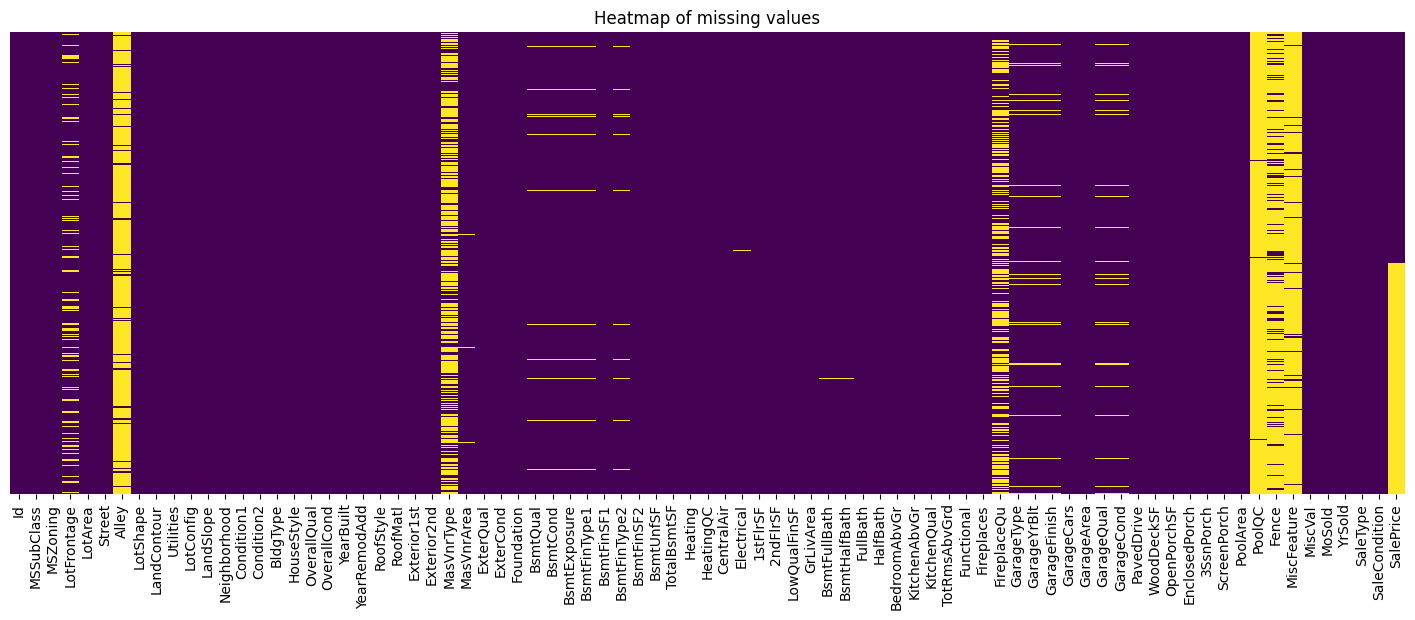

In [ ]:
plt.figure(figsize=(18,6))
plt.title('Heatmap of missing values')
sns.heatmap(data_combined.isnull(),yticklabels=False,cbar=False,cmap='viridis')

FILLING UP THE MISSING VALUES

In [ ]:
data_combined.drop(columns='Id', inplace=True); print('Drop Id \n')
data_combined['MSZoning'] = data_combined['MSZoning'].fillna(data_combined['MSZoning'].mode()[0])
data_combined['LotFrontage'] = data_combined['LotFrontage'].fillna(data_combined['LotFrontage'].mean())
data_combined.drop(columns='Alley', inplace=True); print('Drop Alley \n')


print(data_combined['Utilities'].value_counts())
data_combined.drop(columns='Utilities', inplace=True); print('Drop Utilities \n')

data_combined['Exterior1st'] = data_combined['Exterior1st'].fillna(data_combined['Exterior1st'].mode()[0])
data_combined['Exterior2nd'] = data_combined['Exterior2nd'].fillna(data_combined['Exterior2nd'].mode()[0])
data_combined['MasVnrType'] = data_combined['MasVnrType'].fillna(data_combined['MasVnrType'].mode()[0])
data_combined['MasVnrArea'] = data_combined['MasVnrArea'].fillna(data_combined['MasVnrArea'].mean())
data_combined['Electrical'] = data_combined['Electrical'].fillna(data_combined['Electrical'].mode()[0])
data_combined['KitchenQual'] = data_combined['KitchenQual'].fillna(data_combined['KitchenQual'].mode()[0])
data_combined['Functional'] = data_combined['Functional'].fillna(data_combined['Functional'].mode()[0])

#data_combined.loc[(data_combined['Fireplaces'] != 0) & (data_combined['FireplaceQu'].isnull()) ][['FireplaceQu','Fireplaces']]
data_combined['FireplaceQu'] = data_combined['FireplaceQu'].fillna('NA'); print('FirePlaceQu: Fill NA values for missing values \n')

data_combined.loc[(data_combined['PoolQC'].isnull()) & data_combined['PoolArea']>0][['PoolQC','PoolArea']]
data_combined.at[2599,'PoolQC'] = data_combined['PoolQC'].mode()[0]; print('PoolQC: Use mode for missing value with non-zero PoolAre \n')
data_combined['PoolQC'] = data_combined['PoolQC'].fillna('NA'); print('PoolQC: Use NA for remaining missing values \n')

data_combined['SaleType'].fillna(data_combined['SaleType'].mode()[0], inplace=True)
data_combined.drop(columns=['Fence','MiscFeature','SalePrice'], inplace=True); print('Drop Fence, MiscFeature and SalePrice\n')

# Basement Features
#data_combined.loc[data_combined['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']].head()
#data_combined.loc[data_combined['TotalBsmtSF'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']]
print('Fill missing values of Basement features with NA or 0 \n')
data_combined['BsmtQual'] = data_combined['BsmtQual'].fillna('NA')
data_combined['BsmtCond'] = data_combined['BsmtCond'].fillna('NA')
data_combined['BsmtExposure'] = data_combined['BsmtExposure'].fillna('NA')
data_combined['BsmtFinType1'] = data_combined['BsmtFinType1'].fillna('NA')
data_combined['BsmtFinType2'] = data_combined['BsmtFinType2'].fillna('NA')

data_combined['BsmtFinSF1'] = data_combined['BsmtFinSF1'].fillna(int(0))
data_combined['BsmtFinSF2'] = data_combined['BsmtFinSF2'].fillna(int(0))
data_combined['BsmtUnfSF'] = data_combined['BsmtUnfSF'].fillna(int(0))
data_combined['TotalBsmtSF'] = data_combined['TotalBsmtSF'].fillna(int(0))
data_combined['BsmtFullBath'] = data_combined['BsmtFullBath'].fillna(int(0))
data_combined['BsmtHalfBath'] = data_combined['BsmtHalfBath'].fillna(int(0))

print('Fill missing values of Garage features with NA or 0 \n')
data_combined['GarageType'] = data_combined['GarageType'].fillna('NA')
data_combined['GarageFinish'] = data_combined['GarageFinish'].fillna('NA')
data_combined['GarageCond'] = data_combined['GarageCond'].fillna('NA')
data_combined['GarageQual'] = data_combined['GarageQual'].fillna('NA')
data_combined['GarageCars'] = data_combined['GarageCars'].fillna(int(0))
data_combined['GarageArea'] = data_combined['GarageArea'].fillna(int(0))
data_combined['GarageYrBlt'] = data_combined['GarageYrBlt'].fillna(int(0))

Drop Id 

Drop Alley 

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64
Drop Utilities 

FirePlaceQu: Fill NA values for missing values 

PoolQC: Use mode for missing value with non-zero PoolAre 

PoolQC: Use NA for remaining missing values 

Drop Fence, MiscFeature and SalePrice

Fill missing values of Basement features with NA or 0 

Fill missing values of Garage features with NA or 0 



In [ ]:
data_combined.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,NA,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,NA,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,NA,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,272,0,0,0,NA,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,0,NA,0,12,2008,WD,Normal


In [ ]:
print(data_combined.isnull().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

DATA PREPROCESSING

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
s = (data_combined.dtypes == 'object')
object_cols = list(s[s].index)

print("categorial variables:")
print(object_cols)

print("No of categorial variables:", len(object_cols))


categorial variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'SaleType', 'SaleCondition']
No of categorial variables: 39


In [ ]:
OH_encoder = OneHotEncoder(sparse = False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data_combined[object_cols]))
OH_cols.index = data_combined.index
OH_cols.columns = OH_encoder.get_feature_names_out(input_features=object_cols)

data_final = data_combined.drop(object_cols, axis=1)
data_final = pd.concat([data_final, OH_cols], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


MODEL SELECTION AND PREDICTION

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
x_train = pd.DataFrame(data_final[:1460])
x_test = pd.DataFrame(data_final[1460:])
y_train = pd.DataFrame(train['SalePrice'])

In [ ]:
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,train_size=0.8,test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_RFR = RandomForestRegressor()
model_RFR.fit(x_train,y_train)
y_prediction = model_RFR.predict(x_valid)

print(mean_absolute_error(y_valid,y_prediction))

<ipython-input-21-7be8cac83c19>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFR.fit(x_train,y_train)


17645.98184931507


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model_GBR = GradientBoostingRegressor()
model_GBR.fit(x_train,y_train)
y_prediction = model_GBR.predict(x_valid)

print(mean_absolute_error(y_valid,y_prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


16761.6597525948


In [ ]:
from sklearn.linear_model import SGDRegressor


In [ ]:
model_SGD = SGDRegressor()
model_SGD.fit(x_train,y_train)
y_prediction = model_SGD.predict(x_valid)

print(mean_absolute_error(y_valid,y_prediction))

2.375014537467824e+16


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_XGB = XGBRegressor()
model_XGB.fit(x_train,y_train)
y_prediction = model_XGB.predict(x_valid)

print(mean_absolute_error(y_valid,y_prediction))

18052.789851776542


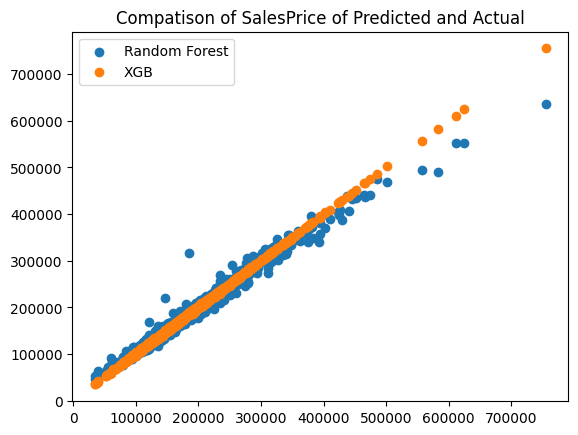

In [ ]:
plt.figure()
plt.title("Compatison of SalesPrice of Predicted and Actual")
plt.scatter(y_train,model_RFR.predict(x_train),label="Random Forest")
plt.scatter(y_train,model_XGB.predict(x_train),label="XGB")
plt.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = XGBRegressor()
n_estimators   = [100, 200, 500]
learning_rates = [0.03,0.1,0.3]
objectives     = ['reg:squarederror']
hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'learning_rate':learning_rates,
    'objective' : objectives
    }
grid_cv = GridSearchCV(estimator = model,
            param_grid = hyperparameter_grid,
            scoring = 'neg_mean_absolute_error',
            return_train_score = True)
grid_cv.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.03, 0.1, 0.3],
                         'n_estimators': [100, 200, 500],
                         'objective': ['reg:squarederror']},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [ ]:
grid_cv.best_score_

-16727.054901003263

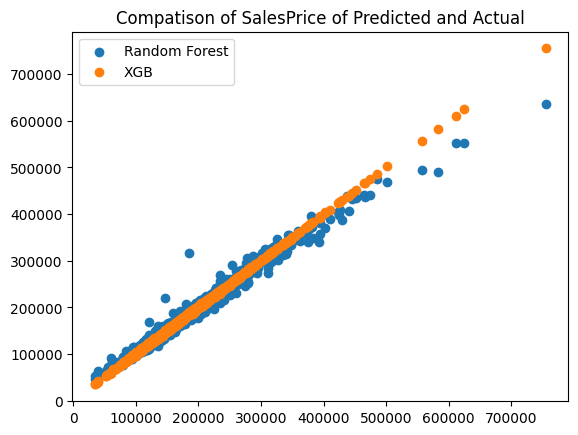

In [ ]:
plt.figure()
plt.title("Compatison of SalesPrice of Predicted and Actual")
plt.scatter(y_train,model_RFR.predict(x_train),label="Random Forest")
plt.scatter(y_train,model_XGB.predict(x_train),label="XGB")
plt.legend()

In [ ]:
import joblib
joblib.dump(model_XGB,"House_Price_Prediction.pkl")

['House_Price_Prediction.pkl']